# MaterialsCoord benchmarking – CrystalNN comparison with and without oxidation states

CrystalNN has slightly different behavior depending on whether oxidation states are included in the structures. It also has a flag `cation_anion` for specifically limiting bonding to sites of opposing charge. The `cation_anion` flag only has an effect if the input structure has oxidation states.

By default, the MaterialsCoord benchmark removes oxidation states (after determining which are the cation and anion sites). This is because the benchmark should test different algorithms starting from the most basic information. If an algorithm NEEDS oxidation states to make predictions its performance will also depend on the oxidation state prediction algorithm as so this process should also be tested.

In this notebook we trial CrystalNN under three environments:
1. Structures don't have oxidation states (CrystalNN (no oxi)). This is the default in the MaterialsCoord benchmark.
2. Structures have oxidation states and `cation_anion=False` (CrystalNN(oxi)).
3. Structures have oxidation states and `cation_anion=True` (CrystalNN(oxi, cation_anion)).

*Written using:*
- MaterialsCoord==0.2.0

*Authors: Alex Ganose (03/30/20)*

---

First, lets initialize the near neighbor methods we are interested in.

In [31]:
from pymatgen.analysis.local_env import CrystalNN

cnn_methods = [CrystalNN(), CrystalNN(porous_adjustment=False), CrystalNN(x_diff_weight=0), CrystalNN(distance_cutoffs=None), CrystalNN(porous_adjustment=False, x_diff_weight=0, distance_cutoffs=None)]

Next, import the benchmark and choose which structures we are interested in. Create two versions of the benchmark, 
one with oxidation states and the other without.

In [2]:
from materialscoord.core import Benchmark

structure_groups = ["common_binaries", "elemental", "A2BX4", "ABX3", "ABX4"]

bm = Benchmark.from_structure_group(structure_groups)

Calculate the scores for both datasets.

In [32]:
import warnings

warnings.filterwarnings("ignore")

scores = bm.score(cnn_methods)

Rename the columns and merge the datasets into one.

In [33]:
import pandas as pd

scores = scores.rename({"CrystalNN(0)": "CrystalNN (default)",
                        "CrystalNN(1)": "CrystalNN (no porous adjustment)",
                        "CrystalNN(2)": "CrystalNN (no electronegativity)", 
                        "CrystalNN(3)": "CrystalNN (no distance cutoffs)",
                        "CrystalNN(4)": "CrystalNN (no electronegativity, \ndistance cutoffs, porous adjustment)"},
                       axis=1)

Plot the scores.

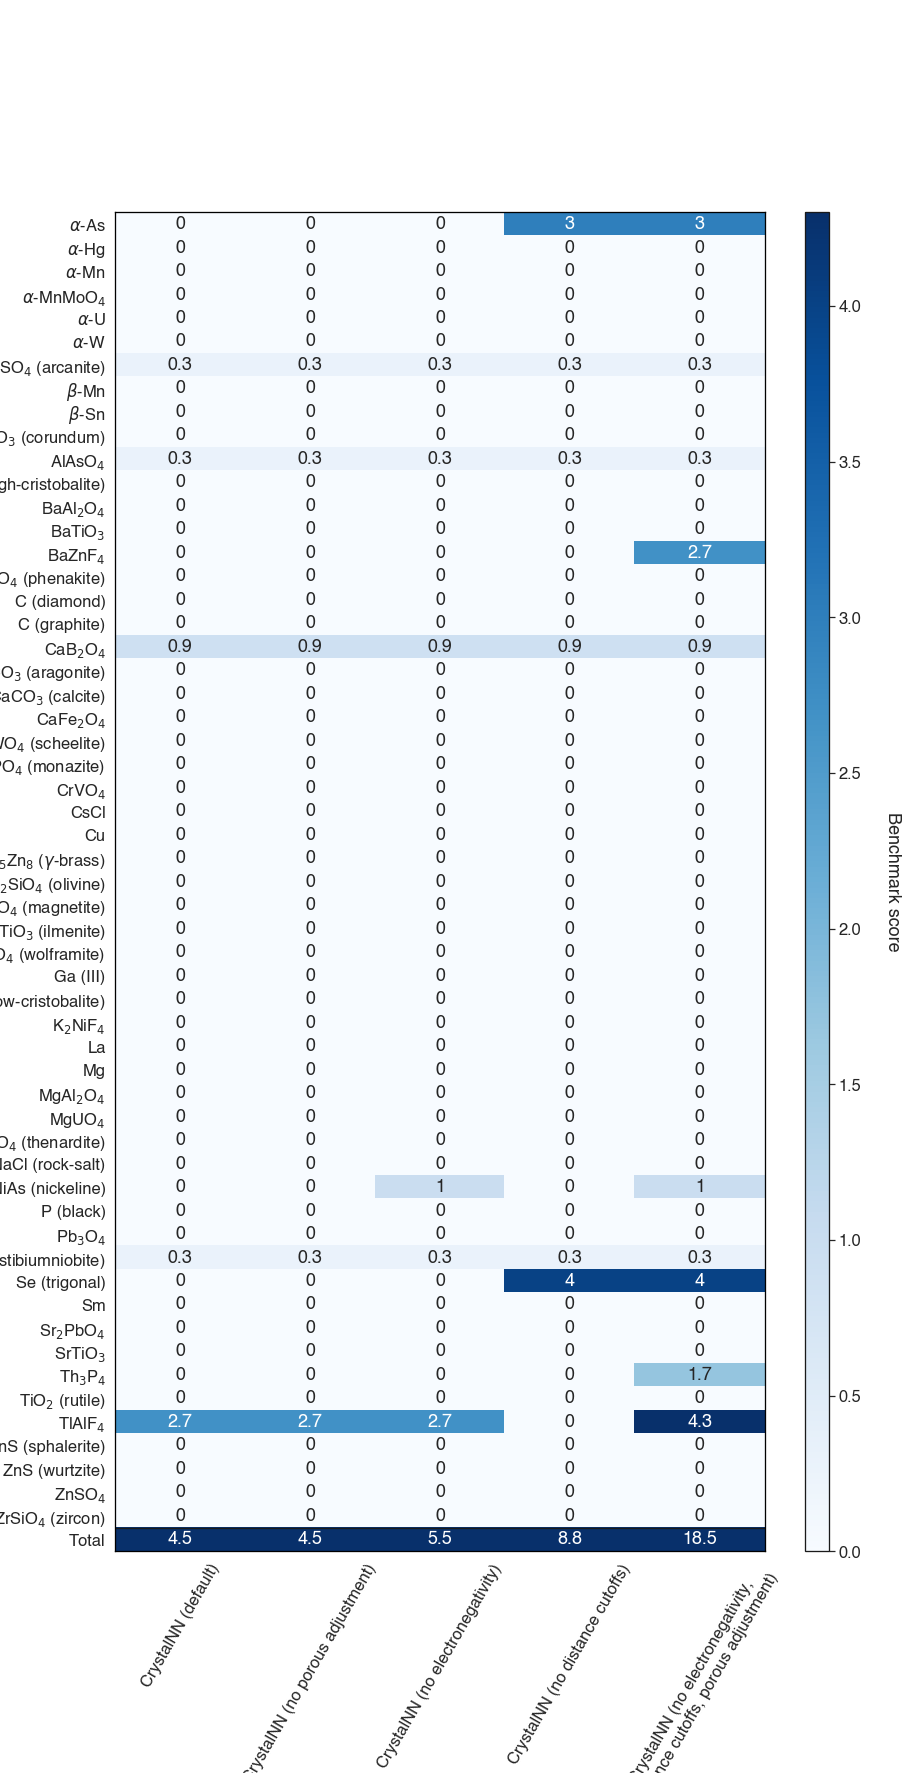

In [35]:
from pathlib import Path

from materialscoord import structure_mapping
from materialscoord.plot import plot_benchmark_scores

plt = plot_benchmark_scores(
    scores, 
    structure_mapping=structure_mapping,
)

plt.savefig(Path("plots", "CrystalNN-tolerances.pdf"), bbox_inches='tight')
plt.show()

In [36]:
! open .